<a href="https://colab.research.google.com/github/BallinCs/Modelado-y-simulaci-n/blob/main/AF7_MySdeSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#AF7 Proyecto Final
#EQUIPO:
#Cesar Ballin Rodríguez 2132117
#David Rodolfo Garcia Castro 2132314
#Brandon Daniel Zavala Gaytan 2055952
#Daniel Aguilar 2023283
#Marcelo Carillo Meza 2049020

import numpy as np

#   FUNCIÓN SIGNO
def signo(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

# DINÁMICA DEL ROBOT PLANAR 2GDL
def cap5_robot2gdl(t, x):

    # Estados
    q1, q2, q1d, q2d = x
    q = np.array([q1, q2])
    qp = np.array([q1d, q2d])


# MATRIZ DE INERCIA
    M = np.array([
        [3.117 + 0.2*np.cos(q[1]), 0.108 + 0.1*np.cos(q[1])],
        [0.108 + 0.1*np.cos(q[1]), 0.108]
    ])


# MATRIZ DE CORIOLIS Y CENTRÍPETA
    C = np.array([
        [-0.2*np.sin(q[1])*qp[1],  -0.1*np.sin(q[1])*qp[1]],
        [ 0.1*np.sin(q[1])*qp[0],   0.0]
    ])


# PAR GRAVITACIONAL
    par_grav = np.array([
        39.3*np.sin(q[0]) + 1.95*np.sin(q[0] + q[1]),
        1.95*np.sin(q[0] + q[1])
    ])

# FRICCIÓN VISCOSA + COULOMB
    fr = np.array([
        1.86*qp[0] + 1.93*signo(qp[0]),
        0.16*qp[1] + 0.3*signo(qp[1])
    ])

# TORQUES APLICADOS
    tau = np.array([
        (1 - np.exp(-0.8*t))*32.0 + 56*np.sin(16*t + 0.1) + 12*np.sin(20*t + 0.15),
        (1 - np.exp(-1.8*t))*1.2  + 8*np.sin(26*t + 0.08) + 2*np.sin(12*t + 0.34)
    ])


# ACELERACIONES ARTICULARES q
    q2p = np.linalg.inv(M) @ (tau - C @ qp - par_grav - fr)


# SALIDA XP
    return np.array([qp[0], qp[1], q2p[0], q2p[1]])

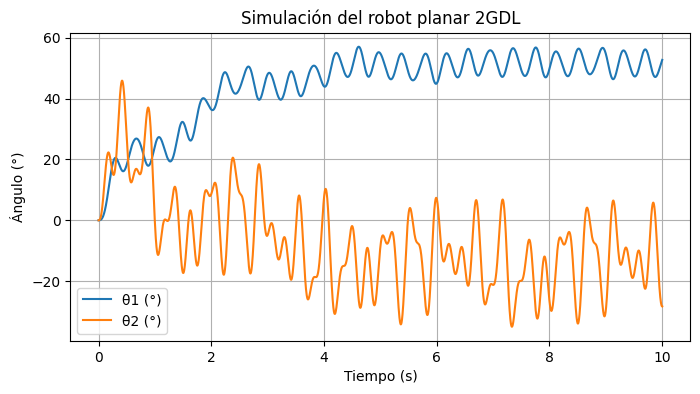

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parámetros de simulación
ti = 0
h  = 0.0025
tf = 10

ts = np.arange(ti, tf + h, h)

# Condiciones iniciales [q1, q2, q1d, q2d]
x0 = [0, 0, 0, 0]

# Configuración tipo ode45 de MATLAB
sol = solve_ivp(
    cap5_robot2gdl,
    [ti, tf],
    x0,
    t_eval=ts,
    rtol=1e-3,
    max_step=2.5e-3
)

# Datos
t = sol.t
x = sol.y.T

# Gráfica
plt.figure(figsize=(8,4))
plt.plot(t, np.rad2deg(x[:,0]), label="θ1 (°)")
plt.plot(t, np.rad2deg(x[:,1]), label="θ2 (°)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Ángulo (°)")
plt.grid()
plt.legend()
plt.title("Simulación del robot planar 2GDL")
plt.show()